In [1]:
import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Netflix.csv')

In [3]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [5]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
data[data['duration'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,16-Sep-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,15-Aug-16,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [7]:
for i in range(data.shape[0]):
    if pd.isnull(data.loc[i,'duration']):
        data.loc[i, 'duration']=data.loc[i,'rating']
        data.loc[i, 'rating']=np.nan

In [8]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [9]:
data[data['rating'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,16-Sep-16,2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,15-Aug-16,2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,26-Jan-17,2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,01-Dec-16,2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,01-Feb-18,2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,01-Mar-17,2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [10]:
split_dur=data['duration'].str.split(" ", expand=True)

In [11]:
split_dur.columns=['length','units']

In [12]:
new_data=pd.concat([data, split_dur], axis=1)

In [13]:
new_data.drop('duration', axis=1, inplace=True)

In [14]:
new_data[new_data['type']=='Movie']['units'].value_counts()

min    6131
Name: units, dtype: int64

In [15]:
new_data[new_data['type']=='TV Show']['units'].value_counts()

Season     1793
Seasons     883
Name: units, dtype: int64

In [16]:
new_data['units'].replace('Season','Seasons', inplace=True)

In [17]:
new_data[new_data['type']=='TV Show']['units'].value_counts()

Seasons    2676
Name: units, dtype: int64

In [18]:
#Average duration of a movie
new_data[new_data['type']=='Movie']['length'].mean()

inf

In [19]:
new_data.groupby('type')['length'].mean()

type
Movie      inf
TV Show    inf
Name: length, dtype: float64

In [20]:
new_data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
listed_in       object
description     object
length          object
units           object
dtype: object

In [21]:
new_data['length']=new_data['length'].astype('int')

In [22]:
#Average length of a movie in min
new_data[new_data['type']=='Movie']['length'].mean()

99.56499755341706

<AxesSubplot: ylabel='Density'>

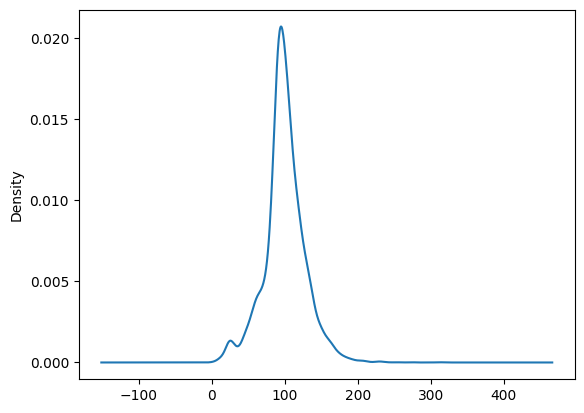

In [23]:
new_data[new_data['type']=='Movie']['length'].plot(kind='kde')

In [24]:
#Average number of seasons of a TV show
new_data[new_data['type']=='TV Show']['length'].median()

1.0

<AxesSubplot: >

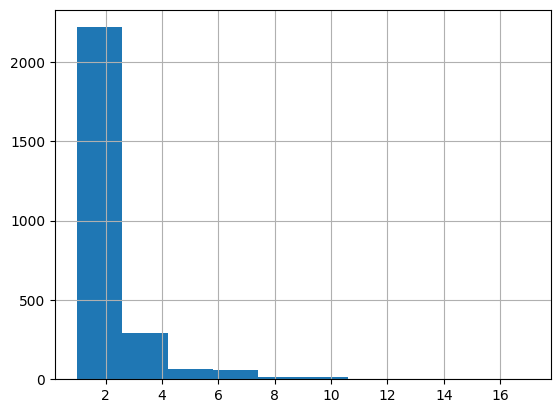

In [25]:
new_data[new_data['type']=='TV Show']['length'].hist()

In [26]:
new_data['date_added'].value_counts()

01-Jan-20    109
01-Nov-19     89
01-Mar-18     75
31-Dec-19     74
01-Oct-18     71
            ... 
04-Dec-16      1
21-Nov-16      1
19-Nov-16      1
17-Nov-16      1
11-Jan-20      1
Name: date_added, Length: 1767, dtype: int64

In [27]:
new_data[new_data['date_added'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,length,units
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",2,Seasons
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,Docuseries,This CNN original series has chef Anthony Bour...,5,Seasons
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...,11,Seasons
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...,10,Seasons
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe...",2,Seasons
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,Kids' TV,A wacky rabbit and his gang of animal pals hav...,2,Seasons
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder...",3,Seasons
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",4,Seasons
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",13,Seasons
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ...",2,Seasons


In [28]:
new_data['date_added']=pd.to_datetime(new_data['date_added'])

In [29]:
new_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'listed_in', 'description', 'length',
       'units'],
      dtype='object')

In [30]:
new_data.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
listed_in               object
description             object
length                   int64
units                   object
dtype: object

In [31]:
new_data['month_added']=new_data['date_added'].dt.month

In [32]:
new_data['year_added']=new_data['date_added'].dt.year

In [33]:
new_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,length,units,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90,min,9.0,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,Seasons,9.0,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,Seasons,9.0,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,Seasons,9.0,2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2,Seasons,9.0,2021.0


In [34]:
new_data.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
listed_in               object
description             object
length                   int64
units                   object
month_added            float64
year_added             float64
dtype: object

In [35]:
new_data.drop('date_added', axis=1, inplace=True)

In [36]:
new_data['year_added'].value_counts()

2019.0    2016
2020.0    1879
2018.0    1649
2021.0    1498
2017.0    1188
2016.0     429
2015.0      82
2014.0      24
2011.0      13
2013.0      11
2012.0       3
2009.0       2
2008.0       2
2010.0       1
Name: year_added, dtype: int64

In [37]:
#so maximum content was added in 2019.

In [38]:
new_data[new_data['year_added'].isnull()]

,show_id,type,title,director,cast,country,release_year,rating,listed_in,description,length,units,month_added,year_added
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,2013,TV-MA,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",2,Seasons,NaN,NaN
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,2018,TV-PG,Docuseries,This CNN original series has chef Anthony Bour...,5,Seasons,NaN,NaN
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,2003,TV-PG,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...,11,Seasons,NaN,NaN
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,2003,TV-14,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...,10,Seasons,NaN,NaN
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,2008,TV-14,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe...",2,Seasons,NaN,NaN
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,2010,TV-Y,Kids' TV,A wacky rabbit and his gang of animal pals hav...,2,Seasons,NaN,NaN
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,2012,TV-14,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder...",3,Seasons,NaN,NaN
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,2016,TV-MA,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",4,Seasons,NaN,NaN
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,2015,NR,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",13,Seasons,NaN,NaN
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,2015,TV-Y7,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ...",2,Seasons,NaN,NaN


In [39]:
new_data['release_year'].value_counts() #so more overall content was released in 2018

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [40]:
new_data.groupby('type')['release_year'].value_counts() #This is not giving the correct picture so I will check individually

type     release_year
Movie    2017            767
         2018            767
         2016            658
         2019            633
         2020            517
                        ... 
TV Show  1979              1
         1981              1
         1985              1
         1989              1
         1991              1
Name: release_year, Length: 119, dtype: int64

In [41]:
new_data[new_data['type']=='Movie']['release_year'].value_counts()

2017    767
2018    767
2016    658
2019    633
2020    517
       ... 
1966      1
1961      1
1946      1
1963      1
1947      1
Name: release_year, Length: 73, dtype: int64

In [42]:
new_data[new_data['type']=='TV Show']['release_year'].value_counts()

2020    436
2019    397
2018    380
2021    315
2017    265
2016    244
2015    162
2014     88
2012     64
2013     63
2010     40
2011     40
2009     34
2008     23
2006     14
2007     14
2005     13
2003     10
2004      9
1999      7
2002      7
2001      5
1993      4
2000      4
1997      4
1998      4
1990      3
1996      3
1992      3
1995      2
1994      2
1988      2
1986      2
1989      1
1967      1
1985      1
1946      1
1981      1
1972      1
1979      1
1977      1
1991      1
1974      1
1925      1
1945      1
1963      1
Name: release_year, dtype: int64

In [43]:
#So maximum movies were released in 2017 and 2018

In [44]:
title_tokens=new_data['title'].apply(str.split)

In [45]:
new_data['count_words_title']=[len(l) for l in new_data['title']]

In [46]:
new_data.sort_values(by='count_words_title', ascending=False)[['title','count_words_title']]

,title,count_words_title
5164,Jim & Andy: The Great Beyond - Featuring a Ver...,104
2813,Ken Burns Presents: College Behind Bars: A Fil...,93
3240,Mike Birbiglia: What I Should Have Said Was No...,88
8462,The Power of Grayskull: The Definitive History...,88
4851,Steve Martin and Martin Short: An Evening You ...,83
...,...,...
4660,PK,2
7687,P,1
2069,H,1
7155,K,1


In [47]:
new_data.loc[5164,'title'] #this is the movie with the longest title

'Jim & Andy: The Great Beyond - Featuring a Very Special, Contractually Obligated Mention of Tony Clifton'

In [48]:
new_data.sort_values(by='count_words_title', ascending=False) #At the same time there are movies with one word titles


,show_id,type,title,director,cast,country,release_year,rating,listed_in,description,length,units,month_added,year_added,count_words_title
5164,s5165,Movie,Jim & Andy: The Great Beyond - Featuring a Ver...,Chris Smith,Jim Carrey,"Canada, United States",2017,TV-MA,Documentaries,Through the lens of his stunningly immersive p...,94,min,11.0,2017.0,104
2813,s2814,TV Show,Ken Burns Presents: College Behind Bars: A Fil...,Lynn Novick,NaN,United States,2019,TV-MA,Docuseries,This docuseries follows several incarcerated p...,1,Seasons,3.0,2020.0,93
3240,s3241,Movie,Mike Birbiglia: What I Should Have Said Was No...,NaN,Mike Birbiglia,United States,2008,TV-MA,Stand-Up Comedy,Mike Birbiglia performs in this live concert s...,56,min,11.0,2019.0,88
8462,s8463,Movie,The Power of Grayskull: The Definitive History...,"Randall Lobb, Robert McCallum",NaN,"Canada, United States",2017,TV-14,Documentaries,This colorful documentary explores the origins...,96,min,8.0,2018.0,88
4851,s4852,Movie,Steve Martin and Martin Short: An Evening You ...,Marcus Raboy,"Steve Martin, Martin Short",United States,2018,TV-14,Stand-Up Comedy,Longtime pals and showbiz icons Steve Martin a...,74,min,5.0,2018.0,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4660,s4661,Movie,PK,Rajkumar Hirani,"Aamir Khan, Anuskha Sharma, Sanjay Dutt, Saura...",India,2014,TV-14,"Comedies, Dramas, International Movies",Aamir Khan teams with director Rajkumar Hirani...,146,min,9.0,2018.0,2
7687,s7688,Movie,P,Paul Spurrier,"Suangporn Jaturaphut, Opal, Dor Yodrak, Pisama...","United Kingdom, Thailand",2006,TV-MA,"Horror Movies, International Movies",An orphan girl taught magic by her sick grandm...,105,min,5.0,2019.0,1
2069,s2070,TV Show,H,NaN,"Jamel Debbouze, Éric Judor, Ramzy Bedia, Cathe...",France,2002,TV-MA,"International TV Shows, TV Comedies","At a dysfunctional hospital in Paris, three bu...",4,Seasons,9.0,2020.0,1
7155,s7156,TV Show,K,NaN,"Daisuke Namikawa, Daisuke Ono, Mikako Komatsu,...",Japan,2012,TV-MA,"Anime Series, Crime TV Shows, International TV...",A young boy is wanted for a crime he has no re...,1,Seasons,12.0,2016.0,1


In [49]:
new_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country',
       'release_year', 'rating', 'listed_in', 'description', 'length', 'units',
       'month_added', 'year_added', 'count_words_title'],
      dtype='object')

In [50]:
genres_split=new_data['listed_in'].str.split(',', expand=True)


In [51]:
genres_split

,0,1,2
0,Documentaries,None,None
1,International TV Shows,TV Dramas,TV Mysteries
2,Crime TV Shows,International TV Shows,TV Action & Adventure
3,Docuseries,Reality TV,None
4,International TV Shows,Romantic TV Shows,TV Comedies
...,...,...,...
8802,Cult Movies,Dramas,Thrillers
8803,Kids' TV,Korean TV Shows,TV Comedies
8804,Comedies,Horror Movies,None
8805,Children & Family Movies,Comedies,None


In [52]:
genres=[]
for i in new_data['listed_in']:
    temp=str(i).split(',')
    for j in temp:
        genres.append(j.strip())

In [53]:
genres

['Documentaries',
 'International TV Shows',
 'TV Dramas',
 'TV Mysteries',
 'Crime TV Shows',
 'International TV Shows',
 'TV Action & Adventure',
 'Docuseries',
 'Reality TV',
 'International TV Shows',
 'Romantic TV Shows',
 'TV Comedies',
 'TV Dramas',
 'TV Horror',
 'TV Mysteries',
 'Children & Family Movies',
 'Dramas',
 'Independent Movies',
 'International Movies',
 'British TV Shows',
 'Reality TV',
 'Comedies',
 'Dramas',
 'Crime TV Shows',
 'Docuseries',
 'International TV Shows',
 'Crime TV Shows',
 'International TV Shows',
 'TV Action & Adventure',
 'Dramas',
 'International Movies',
 'Children & Family Movies',
 'Comedies',
 'British TV Shows',
 'Crime TV Shows',
 'Docuseries',
 'TV Comedies',
 'TV Dramas',
 'Documentaries',
 'International Movies',
 'Crime TV Shows',
 'Spanish-Language TV Shows',
 'TV Dramas',
 'Thrillers',
 'International TV Shows',
 'Spanish-Language TV Shows',
 'TV Action & Adventure',
 'Crime TV Shows',
 'Docuseries',
 'International TV Shows',
 'In

In [54]:
genres_count=[genres.count(i) for i in genres] #or I can simply convert it into a series and use value counts, I did that for countries down below

In [55]:
df_genres=pd.DataFrame([genres, genres_count]).T

In [56]:
df_genres.columns=['Genre','Count']

In [57]:
df_genres.drop_duplicates(inplace=True)

In [58]:
df_genres.sort_values(by='Count', ascending=False) #This shows International movies are the most watched among all types of content

,Genre,Count
18,International Movies,2752
16,Dramas,2427
21,Comedies,1674
1,International TV Shows,1351
0,Documentaries,869
83,Action & Adventure,859
2,TV Dramas,763
17,Independent Movies,756
15,Children & Family Movies,641
58,Romantic Movies,616


In [59]:
#Top 5 most popular movie genres
df_genres.sort_values(by="Count", ascending=False)[:5]

,Genre,Count
18,International Movies,2752
16,Dramas,2427
21,Comedies,1674
1,International TV Shows,1351
0,Documentaries,869


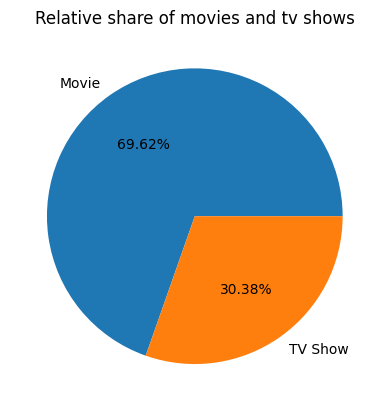

In [60]:
#plotting a pie chart with matplotlib
new_data['type'].value_counts()
plt.pie(new_data['type'].value_counts().values,labels=new_data['type'].value_counts().index, autopct='%.2f%%')
plt.title('Relative share of movies and tv shows')
plt.show()

In [61]:
new_data.isnull().sum()

show_id                 0
type                    0
title                   0
director             2634
cast                  825
country               831
release_year            0
rating                  7
listed_in               0
description             0
length                  0
units                   0
month_added            10
year_added             10
count_words_title       0
dtype: int64

In [62]:
new_data[new_data['director'].isnull()]['type'].value_counts()

TV Show    2446
Movie       188
Name: type, dtype: int64

In [63]:
countries=[]
for i in new_data['country']:
    t=str(i).split(',')
    for j in t:
        countries.append(j)

In [64]:
countries=pd.Series(countries)

In [65]:
countries=countries[countries.apply(lambda x: x!='nan')]

In [66]:
countries.value_counts()

United States     3211
India             1008
United Kingdom     628
 United States     479
Canada             271
                  ... 
 Ecuador             1
Iran                 1
Cyprus               1
 Mongolia            1
 Montenegro          1
Length: 197, dtype: int64

In [67]:
#new_data.to_excel('cleaned.xlsx')

In [68]:
countries[countries.str.startswith(' ')] #Here we need to remove the leading and trailing spaces

8                  Ghana
9           Burkina Faso
10        United Kingdom
11               Germany
12              Ethiopia
              ...       
10834             Canada
10837             France
10838        South Korea
10839          Indonesia
10844             Jordan
Length: 2038, dtype: object

In [69]:
countries.shape

(10019,)

In [70]:
countries=countries.apply(str.strip)

In [71]:
#countries[countries.str.startswith(' ')] 

In [72]:
countries.value_counts() #This shows the content coming from different countries

United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
                  ... 
Ecuador              1
Armenia              1
Mongolia             1
Bahamas              1
Montenegro           1
Length: 123, dtype: int64

In [76]:
new_data[new_data['type']=='Movie']['country'].value_counts() #This shows the top movie producing countries in the world

United States                            2058
India                                     893
United Kingdom                            206
Canada                                    122
Spain                                      97
                                         ... 
United Kingdom, Russia, United States       1
Paraguay, Argentina                         1
United Kingdom, Malawi                      1
Austria, Iraq, United States                1
United Arab Emirates, Jordan                1
Name: country, Length: 651, dtype: int64

In [77]:
new_data[new_data['type']=='TV Show']['country'].value_counts() #This shows the top TV show producing countries

United States                                    760
United Kingdom                                   213
Japan                                            169
South Korea                                      158
India                                             79
                                                ... 
Belarus                                            1
United Kingdom, Australia                          1
France, Australia, Germany                         1
Australia, New Zealand, United States              1
United States, France, South Korea, Indonesia      1
Name: country, Length: 196, dtype: int64